In [ ]:
# Librerias
import numpy as np
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt

## Datos iniciales


In [ ]:
# Cargar el archivo Excel con la matriz de competencia
df_competencia = pd.read_excel("Optimizacion_plantas.xlsx", sheet_name = "Competencia")
df_competencia.drop(columns="Species", inplace=True)
df_competencia

,Agave lechugilla,Agave salmiana,Agave scabra,Agave striata,Opuntia cantabrigienisis,Opuntia engelmannii,Opuntia robusta,Opuntia streptacantha,Proposis laevigata,Yucca filifera
0,100,75,82,85,60,55,60,62,50,75
1,75,100,80,83,68,60,65,67,45,70
2,82,80,100,90,65,60,63,66,52,78
3,85,83,90,100,63,61,62,65,53,79
4,60,68,65,63,90,82,85,88,62,72
5,55,60,60,61,82,90,88,86,60,70
6,60,65,63,62,85,88,90,90,65,75
7,62,67,66,65,88,86,90,90,67,76
8,50,45,52,53,62,60,65,67,90,68
9,75,70,78,79,72,70,75,76,68,90


In [ ]:
# Datos iniciales

n = 658 # Cantidad
poblacion = 10
especies = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
probabilidades_iniciales_por_especie = [0.06, 0.29, 0.06, 0.06, 0.08, 0.06, 0.12, 0.10, 0.13, 0.04]
demanda = [42, 196, 42, 42, 49, 38, 73, 64, 86, 26]
probabilidad_mutacion = 0.4


colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]



In [ ]:
plantas_dict = {
    0: "Agave lechugilla",
    1: "Agave salmiana",
    2: "Agave scabra",
    3: "Agave striata",
    4: "Opuntia cantabrigienisis",
    5: "Opuntia engelmannii",
    6: "Opuntia robusta",
    7: "Opuntia streptacantha",
    8: "Proposis laevigata",
    9: "Yucca filifera"
}

In [ ]:
# Matriz de transición

rows, col = 24, 28

primera_fila = list(range(0,24))
ultima_fila = list(range(635, 658))

primera_columna = list(range(47, 612, 47))
ultima_columna = list(range(23, 635, 47))

segunda_columna = list(range(24,589,47))
penultima_columna = list(range(46,611,47))

def get_neighbors(node):

    diccionario_vecinos = {}
    vecinos = []

    # Consición para primera fila
    if node in primera_fila:
        if node == 0:
            vecinos = [1,24]

        elif node == 23:
            vecinos = [22,46]
        else:
            vecinos = [node-1, node+1, node +23, node+24]

    #Condición para primera columna
    elif node in primera_columna:
        vecinos = [node -23,node +1, node+24]

    # Segunda columna
    elif node in segunda_columna:
        vecinos = [node-24, node-23, node+1, node+23, node+ 24]

    # Penultima columna
    elif node in penultima_columna:
        vecinos = [node -24, node-23, node-1, node+23, node+24]

    # Ultima columna
    elif node in ultima_columna:
        vecinos = [node-24, node-1, node+23]

    # Ultima fila
    elif node in ultima_fila:
        # Esquina izq
        if node == 635:
            vecinos = [node-24, node-23, node+1]

         # Esquina der
        elif node == 657:
            vecinos = [node-24, node-23 , node-1]
        else:
            # Ultima fila
            vecinos = [node-24, node-23, node-1, node +1]


    # Medio
    else:
        vecinos = [node-24, node-23, node-1, node+1, node+23, node+24]

    return vecinos


In [ ]:
diccionario_vecinos = {}

# Llenamos la matriz de transición con los vecinos para cada nodo
for node in range(658):
    diccionario_vecinos[node] = get_neighbors(node)

diccionario_vecinos


{0: [1, 24],
 1: [0, 2, 24, 25],
 2: [1, 3, 25, 26],
 3: [2, 4, 26, 27],
 4: [3, 5, 27, 28],
 5: [4, 6, 28, 29],
 6: [5, 7, 29, 30],
 7: [6, 8, 30, 31],
 8: [7, 9, 31, 32],
 9: [8, 10, 32, 33],
 10: [9, 11, 33, 34],
 11: [10, 12, 34, 35],
 12: [11, 13, 35, 36],
 13: [12, 14, 36, 37],
 14: [13, 15, 37, 38],
 15: [14, 16, 38, 39],
 16: [15, 17, 39, 40],
 17: [16, 18, 40, 41],
 18: [17, 19, 41, 42],
 19: [18, 20, 42, 43],
 20: [19, 21, 43, 44],
 21: [20, 22, 44, 45],
 22: [21, 23, 45, 46],
 23: [22, 46],
 24: [0, 1, 25, 47, 48],
 25: [1, 2, 24, 26, 48, 49],
 26: [2, 3, 25, 27, 49, 50],
 27: [3, 4, 26, 28, 50, 51],
 28: [4, 5, 27, 29, 51, 52],
 29: [5, 6, 28, 30, 52, 53],
 30: [6, 7, 29, 31, 53, 54],
 31: [7, 8, 30, 32, 54, 55],
 32: [8, 9, 31, 33, 55, 56],
 33: [9, 10, 32, 34, 56, 57],
 34: [10, 11, 33, 35, 57, 58],
 35: [11, 12, 34, 36, 58, 59],
 36: [12, 13, 35, 37, 59, 60],
 37: [13, 14, 36, 38, 60, 61],
 38: [14, 15, 37, 39, 61, 62],
 39: [15, 16, 38, 40, 62, 63],
 40: [16, 17, 39, 41

In [ ]:
def crear_matriz_transicion(diccionario_nodos):
    # Encontrar el índice más grande (el número de nodo más alto) tanto en llaves como en vecinos
    num_nodos = max(max(diccionario_nodos.keys()), max(max(v) for v in diccionario_nodos.values())) + 1

    # Crear una matriz de ceros de tamaño num_nodos x num_nodos
    matriz_transicion = np.zeros((num_nodos, num_nodos), dtype=int)

    # Iterar por cada nodo y sus vecinos
    for nodo, vecinos in diccionario_nodos.items():
        for vecino in vecinos:
            matriz_transicion[nodo, vecino] = 1  # Marcar con 1 las posiciones de los vecinos

    return matriz_transicion

In [ ]:
matriz_trans = crear_matriz_transicion(diccionario_vecinos)
matriz_trans

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

### Función para generar un vector respetando la demanda y probabilidades

In [ ]:
# Función para generar un vector respetando la demanda y probabilidades
def generar_vector_respetando_demanda(n):
    vector_base = np.zeros(n)
    num_especies = int(n * 0.20)

    # Hacer una copia del vector base
    vector = np.copy(vector_base)

    # Lista para almacenar las especies seleccionadas sin exceder la demanda
    especies_seleccionadas = []

    # Generar especies bajo demanda iniciales (20% del total)
    while len(especies_seleccionadas) < num_especies:
        # Selecciona una especie aleatoriamente basada en las probabilidades
        especie = np.random.choice(especies, p=probabilidades_iniciales_por_especie)

        # Verifica cuántas veces ya ha sido seleccionada la especie
        conteo_actual = especies_seleccionadas.count(especie)

        # Verifica si el conteo no excede la demanda permitida
        if conteo_actual < demanda[especies.index(especie)]:
            especies_seleccionadas.append(especie)


    # Elegir posiciones aleatorias en el vector base (donde haya ceros)
    posiciones_ceros = np.where(vector == 0)[0]
    posiciones_a_llenas = np.random.choice(posiciones_ceros, size=num_especies, replace=False)

    # Asignar las especies seleccionadas a las posiciones en el vector
    vector[posiciones_a_llenas] = especies_seleccionadas

    # Guardar las posiciones no mutables (las primeras llenadas)
    posiciones_no_mutables = posiciones_a_llenas.tolist()



    # Llenar los ceros restantes de manera aleatoria respetando la demanda
    posiciones_ceros_restantes = np.where(vector == 0)[0]



    for posicion in posiciones_ceros_restantes:
        # Intentar asignar una especie aleatoria respetando la demanda
        asignado = False
        while not asignado:
            especie = np.random.choice(especies, p=probabilidades_iniciales_por_especie)
            conteo_actual_en_vector = np.count_nonzero(vector == especie)
            maximo_permitido = demanda[especies.index(especie)]

            if conteo_actual_en_vector < maximo_permitido:
                vector[posicion] = especie
                asignado = True

    return vector, posiciones_no_mutables

"""
poblacion_inicial = []
posiciones_no_mutables_globales = []

for _ in range(poblacion):
    cromosoma, posiciones_no_mutables = generar_vector_respetando_demanda(n)
    poblacion_inicial.append(cromosoma)  # Guardar el cromosoma generado
    posiciones_no_mutables_globales.append(posiciones_no_mutables)  # Guardar las posiciones no mutables de manera separada

# Mostrar los vectores generados y las posiciones no mutables
print("Vectores generados:")
for i, crom in enumerate(poblacion_inicial):
    print(f"Vector {i + 1}: {crom}")

print("\nPosiciones no mutables por vector:")
for i, posiciones_no_mutables in enumerate(posiciones_no_mutables_globales):
    print(f"Posiciones no mutables del vector {i + 1}: {posiciones_no_mutables}")
"""

'\npoblacion_inicial = []\nposiciones_no_mutables_globales = []\n\nfor _ in range(poblacion):\n    cromosoma, posiciones_no_mutables = generar_vector_respetando_demanda(n)\n    poblacion_inicial.append(cromosoma)  # Guardar el cromosoma generado\n    posiciones_no_mutables_globales.append(posiciones_no_mutables)  # Guardar las posiciones no mutables de manera separada\n\n# Mostrar los vectores generados y las posiciones no mutables\nprint("Vectores generados:")\nfor i, crom in enumerate(poblacion_inicial):\n    print(f"Vector {i + 1}: {crom}")\n\nprint("\nPosiciones no mutables por vector:")\nfor i, posiciones_no_mutables in enumerate(posiciones_no_mutables_globales):\n    print(f"Posiciones no mutables del vector {i + 1}: {posiciones_no_mutables}")\n'

## Dibujo de las posiciones no mutables.



In [ ]:
def grid_posiciones_no_mutables(cromosoma, no_mutable, final):
    # Crear un gráfico de 28x47 celdas
    fig, ax = plt.subplots(figsize=(15, 10))

    # Ajustar el rango de la cuadrícula
    ax.set_xlim(0, 47)
    ax.set_ylim(0, 29)

    # Mostrar líneas de la cuadrícula
    ax.set_xticks(range(48))
    ax.set_yticks(range(29))
    ax.grid(True)

    # Invertir el eje Y para que el (0, 0) esté en la esquina superior izquierda
    ax.invert_yaxis()


    # Agregar puntos alternados con identificadores
    point_id = 0
    for row in range(28):
        for col in range(47):
            # Poner puntos si la suma de la fila y columna es par (alternar)
            if (row + col) % 2 == 0:
                especie = int(cromosoma[point_id]) - 1

                if final:
                    if point_id in no_mutable:
                        ax.plot(col, row + 1, 'x', color= colors[especie])
                    else:
                        ax.plot(col, row + 1, 'o', color= colors[especie])
                else:
                      ax.plot(col, row + 1, 'o', color= colors[especie])
                point_id += 1

    plt.show()

In [ ]:
# Definimos la función encontrar_competencia
def encontrar_competencia(poblacion_inicial, vecinos_nodos, df_competencia):
    fitness_poblacion = []
    suma_competencia_total = 0

    # Procesar cada vector en la población inicial
    for cromosoma in poblacion_inicial:
        competencia_por_vector = []
        suma_competencia_vector = 0

        # Procesar cada nodo y sus vecinos
        for nodo, vecinos in vecinos_nodos.items():
            competencia_por_nodo = 0

            # Comparar el nodo con cada uno de sus vecinos
            for conectado in vecinos:
                valor_nodo = cromosoma[nodo]
                valor_conectado = cromosoma[conectado]

                # Obtener el valor de compatibilidad de la matriz de competencia
                valor_compatibilidad = df_competencia.iloc[int(valor_nodo)-1, int(valor_conectado)-1]

                # Ajustar el valor de compatibilidad según la cercanía de los nodos
                if abs(nodo - conectado) == 1:
                    valor_compatibilidad /= 4
                else:
                    valor_compatibilidad /= 6.4

                # Sumar el valor de compatibilidad al total del nodo
                competencia_por_nodo += valor_compatibilidad

            # Añadir la competencia del nodo al total del vector
            competencia_por_vector.append(competencia_por_nodo)
            suma_competencia_vector += competencia_por_nodo  # Sumar la competencia de cada nodo en el vector

        # Añadir la competencia del vector a la lista de fitness de la población
        fitness_poblacion.append(competencia_por_vector)


        fitness_individual =[]
    for i, vector in enumerate(fitness_poblacion):
        suma_vector = sum(vector)
        fitness_individual.append(suma_vector)


    return fitness_poblacion, fitness_individual



In [ ]:
# Llamada a la función encontrar_competencia
# competencias_nodo, fitness = encontrar_competencia(poblacion_inicial, diccionario_vecinos, df_competencia)


# for i in range(len(fitness)):
#     print(f'Las función fitness para el vector {i+1} es: {int(fitness[i])}')


### Seleccionar padres

Seleccionaremos a los mejores padres basandonos en las funciones fitnes con los valores más pequeños.


In [ ]:
# valores_enumerados = list(enumerate(fitness))

# # Ordenamos por el valor (segundo elemento de cada tupla)
# indices_minimos = sorted(valores_enumerados, key=lambda x: x[1])

# # Obtenemos las posiciones de los dos valores más pequeños
# pos1, pos2 = indices_minimos[0][0], indices_minimos[1][0]



# print(f"Las posiciones de los dos valores más pequeños son: {pos1} y {pos2}")

In [ ]:
# padres = [poblacion_inicial[pos1], poblacion_inicial[pos2]]
# no_mutables_selec = [posiciones_no_mutables_globales[pos1], posiciones_no_mutables_globales[pos2]]


# # Imprimir las posiciones no mutables de los padres.
# grid_posiciones_no_mutables(padres[0], no_mutables_selec[0])
# grid_posiciones_no_mutables(padres[1], no_mutables_selec[1])

# competencia_padres = [competencias_nodo[pos1], competencias_nodo[pos2]]


### Mutación de los cromosomas Padres

In [ ]:
def mutacion(crom, umbral,  posiciones_no_mutables, competencia_nodo, porcentaje):
    if np.random.rand() < umbral:
        for i in range(len(crom)):
        # Comprobamos si la posición es no mutable
            if i in posiciones_no_mutables:
                continue  # Si es una posición no mutable, la saltamos

        # Generamos un número aleatorio entre 0 y 1 para cada posición
        probabilidad = np.random.rand()
        if probabilidad < umbral:

            while True:
                numero_mutado = np.random.randint(0, len(crom))
                if numero_mutado not in posiciones_no_mutables:
                    crom[i], crom[numero_mutado] = crom[numero_mutado], crom[i]
                    break

                else:
                    numero_mutado = np.random.randint(0, len(crom))

        return crom

    else:

        for i in posiciones_no_mutables:
            competencia_nodo[i] = competencia_nodo[i] * -1

        # x , fitness_crom = encontrar_competencia(crom, diccionario_vecinos, df_competencia)

        valores_enumerados = list(enumerate(competencia_nodo))

        # Ordenar la lista basada en el valor del fitness (segundo elemento de la tupla) en orden descendente
        orden = sorted(valores_enumerados, key=lambda x: x[1], reverse=True)

        # Calcular el 10% de la lista
        diez_por_ciento = int(len(orden) * porcentaje)

        # Guardar los índices
        indices_maximos = [orden[i][0] for i in range(diez_por_ciento)]


        # Mezclamos los valores
        valores_mezcla = crom[indices_maximos]
        np.random.shuffle(valores_mezcla)
        crom[indices_maximos] = valores_mezcla
    return crom

In [ ]:
# Datos de los padres
# padres = [poblacion_inicial[pos1], poblacion_inicial[pos2]]
# no_mutables_selec = [posiciones_no_mutables_globales[pos1], posiciones_no_mutables_globales[pos2]]
# competencia_padres

# # Almacenar los hijos
# hijos = []
# for i in range(len(padres)):
#     hijos.append(mutacion(padres[i], 0.7,  no_mutables_selec[i], competencia_padres[i], 0.10))



# # Almacenar las fitness de los hijos
# competencias_nodo_2, fitness_hijos = encontrar_competencia(hijos, diccionario_vecinos, df_competencia)

# print(fitness_hijos)


In [ ]:
def reemplazo(hijos_mutados, poblacion_inicial):
    fitness_gen, fitness_crom = encontrar_competencia(poblacion_inicial, diccionario_vecinos, df_competencia)  # Población inicial
    fitness_hijos_gen, fitness_hijos_crom = encontrar_competencia(hijos_mutados, diccionario_vecinos, df_competencia)  # Hijos

    # Posiciones a salir: los cromosomas con peor fitness en la población inicial
    indices_maximos = sorted(range(len(fitness_crom)), key=lambda x: fitness_crom[x], reverse=True)[:2]

    # Reemplazar los cromosomas originales con los hijos si tienen mejor fitness
    hijo_que_entra =[]
    for i in range(2):
        # Verificar si el hijo tiene mejor fitness que el cromosoma en la posición original
        if fitness_hijos_crom[i] < fitness_crom[indices_maximos[i]]:
            # print(f'Reemplazando cromosoma en posición {indices_maximos[i]}:')
            # print(f'Entra el hijo{i}')
            hijo_que_entra.append(i)

            poblacion_inicial[indices_maximos[i]] = hijos_mutados[i]

    return poblacion_inicial


In [ ]:
# nueva_poblacion = reemplazo(hijos, poblacion_inicial)
# print(nueva_poblacion)

In [ ]:
def algoritmo_gen(n_poblacion, iteraciones, umbral, porcentaje_de_modificacion, rango):
    poblacion_final = []
    poblacion_final_posiciones_no_mutables = []
    for i in range(iteraciones):
        for _ in range(rango):
            print(_)
            poblacion_inicial = []
            posiciones_no_mutables_globales = []

            for _ in range(n_poblacion):
                cromosoma, posiciones_no_mutables = generar_vector_respetando_demanda(n)
                poblacion_inicial.append(cromosoma)  # Guardar el cromosoma generado
                posiciones_no_mutables_globales.append(posiciones_no_mutables)  # Guardar las posiciones no mutables de manera separada

            # Calcular el fitness de la población inicial
            competencias_gen, fitness_cromosoma = encontrar_competencia(poblacion_inicial, diccionario_vecinos, df_competencia)

            #seleccionamos a los padres de la población
            # Estos padres son los 2 cromosomas con los fitness más pequeños
            valores_enumerados = list(enumerate(fitness_cromosoma))
            # Ordenamos por el valor (segundo elemento de cada tupla)
            indices_minimos = sorted(valores_enumerados, key=lambda x: x[1])

            # Obtenemos las posiciones de los dos valores más pequeños
            pos1, pos2 = indices_minimos[0][0], indices_minimos[1][0]
            # print(f"Las posiciones de los dos valores más pequeños son: {pos1} y {pos2}")

            padres = [poblacion_inicial[pos1], poblacion_inicial[pos2]]
            no_mutables_selec = [posiciones_no_mutables_globales[pos1], posiciones_no_mutables_globales[pos2]]
            fitness_padres_gen = [competencias_gen[pos1], competencias_gen[pos2]]
            fitness_total_padres = [fitness_cromosoma[pos1], fitness_cromosoma[pos2]]

            # Almacenar los hijos
            hijos = []

            for i in range(len(padres)):
                hijo = mutacion(padres[i], umbral,  no_mutables_selec[i], fitness_padres_gen[i],
                                      porcentaje_de_modificacion)
                hijos.append(hijo)

            # Almacenar las fitness de los hijos
            competencias_gen_2, fitness_hijos = encontrar_competencia(hijos, diccionario_vecinos, df_competencia)
            # print(fitness_hijos)

            nueva_poblacion = reemplazo(hijos, poblacion_inicial)



                # print(nueva_poblacion)

        #print("NP", nueva_poblacion)
        competencias_gen_final, fitness_final = encontrar_competencia(nueva_poblacion, diccionario_vecinos, df_competencia)

        mejor_indice = np.argmin(fitness_final)
        print("MI", mejor_indice)
        poblacion_final.append(nueva_poblacion[mejor_indice])
        # poblacion_final_posiciones_no_mutables.append()
        print(f' Generación {i + 1}')
        i += 1
        #print("PF", poblacion_final)
        print("Longitud de mejores soluciones",len(poblacion_final))
    return poblacion_final, no_mutables_selec

In [ ]:
mejores_cromosomas_global, no_mutables_mejores = algoritmo_gen(5, 1000, 0.5, 0.20, 100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
MI 0
 Generación 2
Longitud de mejores soluciones 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
MI 0
 Generación 2
Longitud de mejores soluciones 2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
MI 0
 Generación 2
Longitu

48988.875


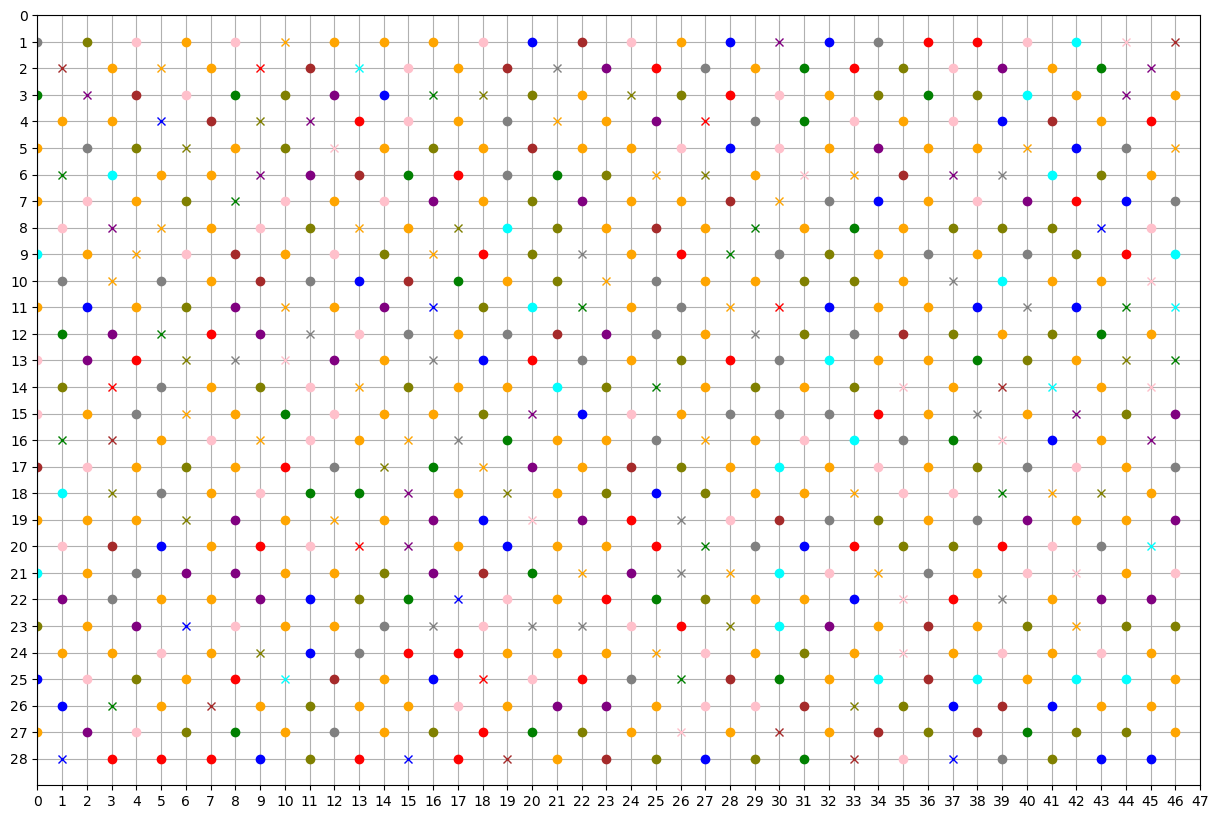

In [ ]:
competencias_gen_final, fitness_final = encontrar_competencia(mejores_cromosomas_global, diccionario_vecinos, df_competencia)

for index, valor in enumerate(fitness_final):
    mejor_indice = np.argmin(fitness_final)
    mejor_cromosoma = mejores_cromosomas_global[mejor_indice]

print(fitness_final[mejor_indice])
grid_posiciones_no_mutables(mejor_cromosoma, no_mutables_mejores[0], True)

In [ ]:
num_columnas = 11
ocurrencias_por_ubicacion = np.zeros((658, num_columnas), dtype=int)

for cromosoma in mejores_cromosomas_global:
    for index, valor in enumerate(cromosoma):
        ocurrencias_por_ubicacion[index, int(valor)] += 1

df = pd.DataFrame(ocurrencias_por_ubicacion)
df.drop(columns=0)



,1,2,3,4,5,6,7,8,9,10
0,53,304,54,67,76,52,131,97,126,40
1,70,288,58,55,68,68,116,102,128,47
2,66,304,65,63,95,57,121,74,124,31
3,56,310,52,61,67,61,120,110,126,37
4,63,270,62,72,73,71,128,88,140,33
...,...,...,...,...,...,...,...,...,...,...
653,136,143,167,145,47,55,67,84,75,81
654,141,119,146,164,47,64,60,86,78,95
655,145,114,137,162,51,69,54,79,77,112
656,143,113,154,172,56,68,41,85,54,114


In [ ]:
num_columnas = 11
ocurrencias_por_ubicacion = np.zeros((658, num_columnas), dtype=int)

for cromosoma in mejores_cromosomas_global:
    for index, valor in enumerate(cromosoma):
        ocurrencias_por_ubicacion[index, int(valor)] += 1

df = pd.DataFrame(ocurrencias_por_ubicacion)
df = df.drop(columns=0)

# Dividir cada columna por su respectivo divisor usando el vector
df_dividido = df.div(demanda, axis=1)

df_dividido

,1,2,3,4,5,6,7,8,9,10
0,1.261905,1.551020,1.285714,1.595238,1.551020,1.368421,1.794521,1.515625,1.465116,1.538462
1,1.666667,1.469388,1.380952,1.309524,1.387755,1.789474,1.589041,1.593750,1.488372,1.807692
2,1.571429,1.551020,1.547619,1.500000,1.938776,1.500000,1.657534,1.156250,1.441860,1.192308
3,1.333333,1.581633,1.238095,1.452381,1.367347,1.605263,1.643836,1.718750,1.465116,1.423077
4,1.500000,1.377551,1.476190,1.714286,1.489796,1.868421,1.753425,1.375000,1.627907,1.269231
...,...,...,...,...,...,...,...,...,...,...
653,3.238095,0.729592,3.976190,3.452381,0.959184,1.447368,0.917808,1.312500,0.872093,3.115385
654,3.357143,0.607143,3.476190,3.904762,0.959184,1.684211,0.821918,1.343750,0.906977,3.653846
655,3.452381,0.581633,3.261905,3.857143,1.040816,1.815789,0.739726,1.234375,0.895349,4.307692
656,3.404762,0.576531,3.666667,4.095238,1.142857,1.789474,0.561644,1.328125,0.627907,4.384615


In [ ]:
plantas_dict = {
    0: "Agave lechugilla",
    1: "Agave salmiana",
    2: "Agave scabra",
    3: "Agave striata",
    4: "Opuntia cantabrigienisis",
    5: "Opuntia engelmannii",
    6: "Opuntia robusta",
    7: "Opuntia streptacantha",
    8: "Proposis laevigata",
    9: "Yucca filifera"
}

In [ ]:
resultados = {}
resutlados_2 = {}

# Obtener el índice de la columna con el valor máximo para cada fila
for index, row in df_dividido.iterrows():
    max_col = row.idxmax()  # Índice de la columna con el valor máximo en la fila
    resultados[index] = plantas_dict[max_col-1]
    resutlados_2[index] = max_col

# print(resultados)
resutlados_2

{0: 7,
 1: 10,
 2: 5,
 3: 8,
 4: 6,
 5: 6,
 6: 7,
 7: 3,
 8: 7,
 9: 1,
 10: 10,
 11: 6,
 12: 5,
 13: 10,
 14: 6,
 15: 6,
 16: 4,
 17: 10,
 18: 10,
 19: 6,
 20: 6,
 21: 10,
 22: 10,
 23: 6,
 24: 5,
 25: 3,
 26: 5,
 27: 10,
 28: 7,
 29: 6,
 30: 6,
 31: 3,
 32: 5,
 33: 1,
 34: 6,
 35: 10,
 36: 5,
 37: 7,
 38: 10,
 39: 8,
 40: 3,
 41: 10,
 42: 6,
 43: 4,
 44: 6,
 45: 7,
 46: 4,
 47: 10,
 48: 6,
 49: 3,
 50: 7,
 51: 6,
 52: 7,
 53: 8,
 54: 8,
 55: 7,
 56: 10,
 57: 5,
 58: 5,
 59: 8,
 60: 4,
 61: 10,
 62: 10,
 63: 10,
 64: 10,
 65: 5,
 66: 3,
 67: 10,
 68: 6,
 69: 9,
 70: 7,
 71: 7,
 72: 10,
 73: 10,
 74: 10,
 75: 10,
 76: 3,
 77: 10,
 78: 6,
 79: 10,
 80: 5,
 81: 5,
 82: 6,
 83: 4,
 84: 6,
 85: 5,
 86: 10,
 87: 5,
 88: 10,
 89: 7,
 90: 10,
 91: 7,
 92: 8,
 93: 8,
 94: 7,
 95: 1,
 96: 7,
 97: 7,
 98: 10,
 99: 4,
 100: 7,
 101: 6,
 102: 1,
 103: 3,
 104: 10,
 105: 5,
 106: 6,
 107: 10,
 108: 6,
 109: 5,
 110: 3,
 111: 10,
 112: 10,
 113: 5,
 114: 1,
 115: 8,
 116: 6,
 117: 5,
 118: 6,
 119: 9

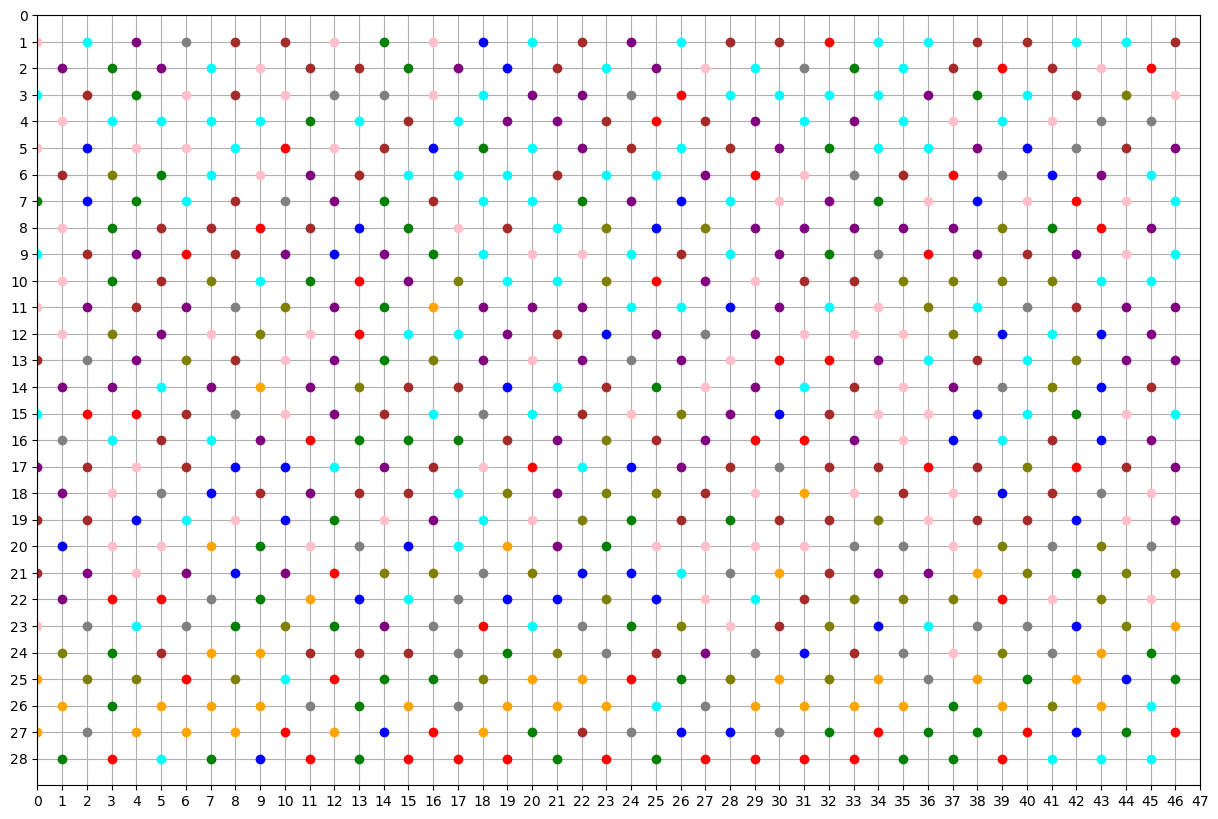

In [ ]:
# Crear un vector de longitud 658 (máximo índice + 1)
vector = np.zeros(max(resultados.keys()) + 1, dtype=int)

# Llenar el vector con los valores del diccionario
for index, value in resutlados_2.items():
    vector[index] = value

grid_posiciones_no_mutables(vector,None, False)